In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("monthly_milk_production.csv", index_col='Date',parse_dates=True)

In [49]:
df.dtypes

Production    int64
dtype: object

In [51]:
df.index.freq='MS'

In [55]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

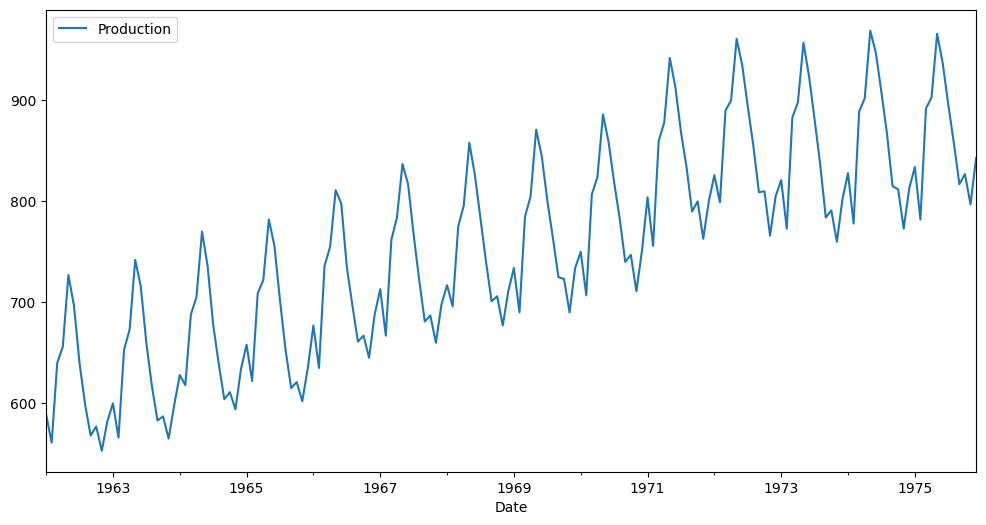

In [59]:
df.plot(figsize=(12,6))

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose

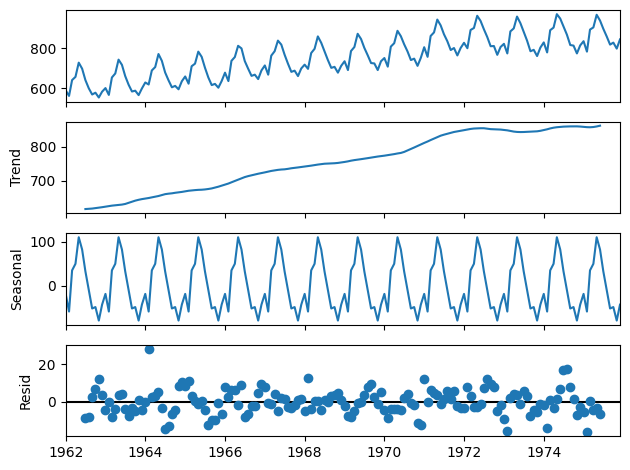

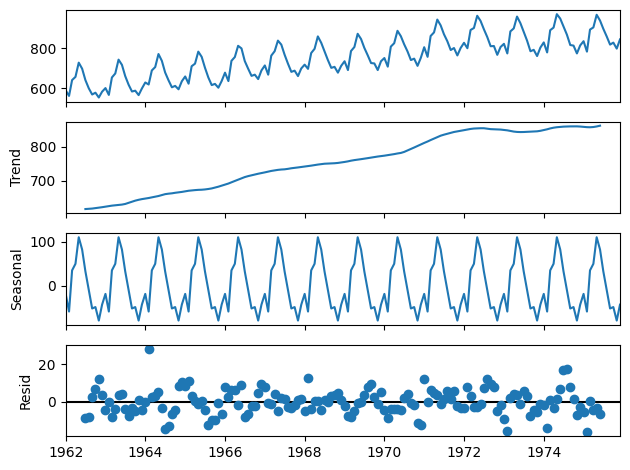

In [71]:
decomposed_data = seasonal_decompose(df)
decomposed_data.plot()

In [73]:
len(df)

168

In [77]:
train_set = df.iloc[:130]
test_set = df.iloc[130:]

In [93]:
train_set.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [81]:
9## Prepare data for 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [87]:
scaler.fit(df)
scaled_train = scaler.transform(train_set)
scaled_test = scaler.transform(test_set)

In [105]:
scaled_full_set = np.concatenate((scaled_train, scaled_test))

In [107]:
df['Scaled_Production'] = scaled_full_set

In [115]:
display(df.head())
display(df.tail())

,Production,Scaled_Production
Date,,
1962-01-01,589,0.086538
1962-02-01,561,0.019231
1962-03-01,640,0.209135
1962-04-01,656,0.247596
1962-05-01,727,0.418269


,Production,Scaled_Production
Date,,
1975-08-01,858,0.733173
1975-09-01,817,0.634615
1975-10-01,827,0.658654
1975-11-01,797,0.586538
1975-12-01,843,0.697115


In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator

n_input = 3
n_features = 1

generator = TimeseriesGenerator(